In [16]:
import pandas as pd
import os
import numpy as np
import sklearn
import dataFuncs
import matplotlib.pyplot as plt
import seaborn as sns

#Initialise repositories
_projroot = os.path.abspath('.')
_datadir = os.path.join(_projroot,'data')
_preprocesseddir = os.path.join(_datadir,'preprocesseddata')
_testdir = os.path.join(_datadir,'testdata')
_rawdir = os.path.join(_datadir,'rawdata')

WCC_Survey = pd.read_csv(os.path.join(_preprocesseddir,"WCC_Survey_Compress.csv"))
WCC_Survey = WCC_Survey.drop('Unnamed: 0', axis = 1)

In [17]:
cont = WCC_Survey.select_dtypes(exclude=['object'])
cat = WCC_Survey.select_dtypes(exclude=['float64', 'int'])
cat['Target'] = WCC_Survey['Target']

<ipython-input-17-2cfd19070a14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Target'] = WCC_Survey['Target']


In [18]:
cont.describe()

,Target,AGE,Q5a,Q5b,Q5c,Q5d,Q5e,Q5g,Q5h,Q5i,...,Q33,Q34,Q35,Q36a,Q36b,Q36c,Q38,Number of council services accessed,Information about public services,Usefulness of offline publication
count,1038.000000,913.000000,1034.000000,1034.000000,811.000000,1019.000000,930.000000,1032.000000,1034.000000,1031.000000,...,1038.000000,1038.000000,1038.000000,1021.000000,1024.000000,1024.000000,1020.000000,1038.000000,1015.000000,824.000000
mean,0.073218,44.407448,3.500000,3.520309,3.173859,3.502453,2.602151,3.287791,3.419729,3.191077,...,8.640655,8.570328,4.662813,1.252693,1.207031,1.213867,7.706863,0.124277,2.213153,1.985437
std,0.260619,15.868167,1.430717,1.359800,1.481776,1.332952,1.513767,1.437183,1.351145,1.447917,...,1.567807,1.487449,2.566377,0.501767,0.468050,0.461799,1.874720,0.413103,0.731565,0.867947
min,0.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,32.000000,2.000000,2.250000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,...,8.000000,8.000000,3.000000,1.000000,1.000000,1.000000,7.000000,0.000000,1.800000,1.500000
50%,0.000000,43.000000,4.000000,4.000000,3.000000,4.000000,2.000000,3.000000,4.000000,3.000000,...,9.000000,9.000000,4.000000,1.000000,1.000000,1.000000,8.500000,0.000000,2.000000,2.000000
75%,0.000000,55.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,...,10.000000,9.000000,6.000000,1.000000,1.000000,1.000000,9.000000,0.000000,2.800000,2.000000
max,1.000000,94.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,12.000000,12.000000,12.000000,3.000000,3.000000,3.000000,9.000000,3.000000,4.000000,6.000000


In [19]:
cont.corr().to_csv(os.path.join(_preprocesseddir,"WCC_Correlation.csv"))

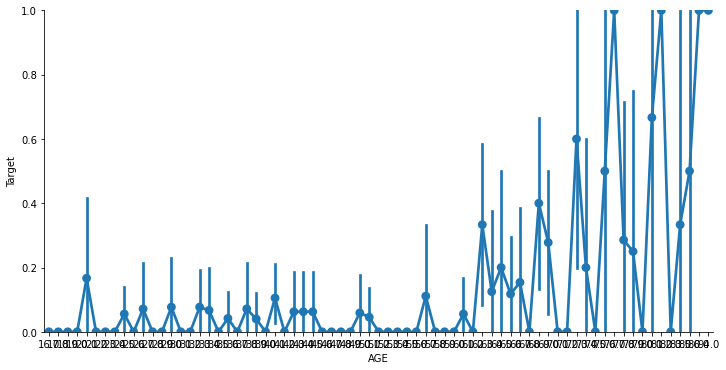

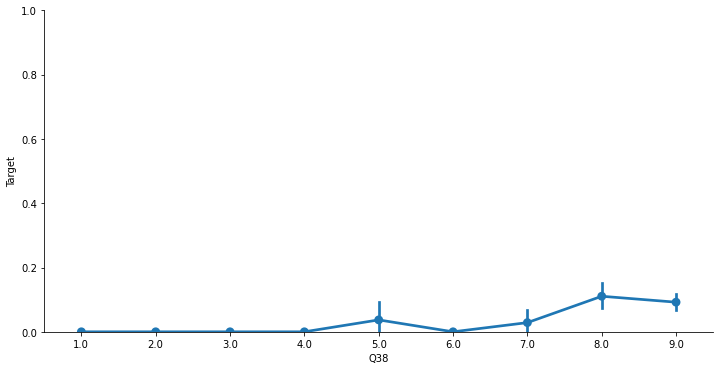

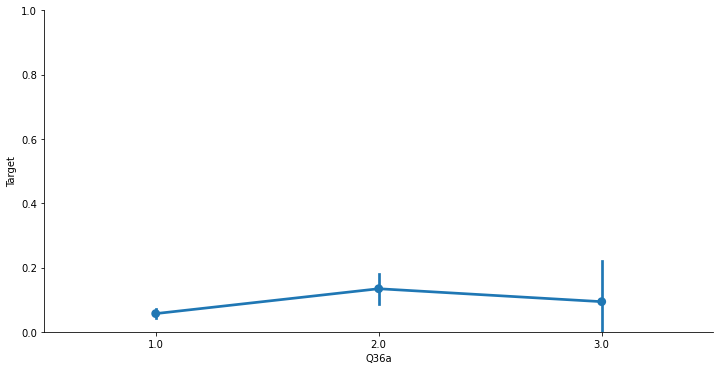

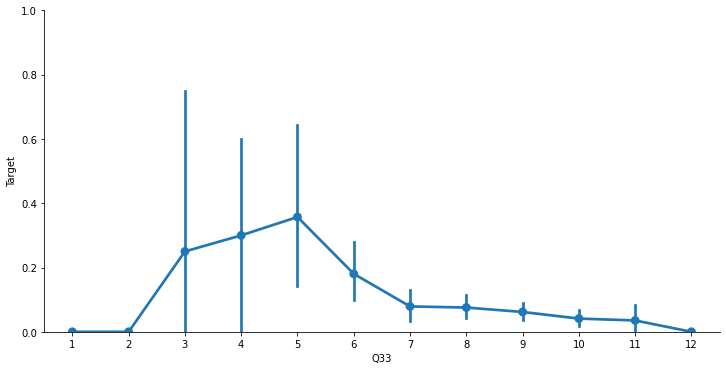

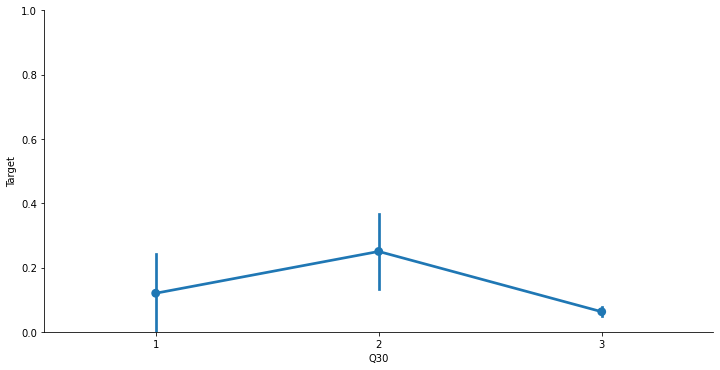

In [20]:
for col in ['AGE', 'Q38', 'Q36a','Q33','Q30']:
    sns.catplot(x=col, y='Target', data=cont, kind='point', aspect=2, )
    plt.ylim(0, 1)

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


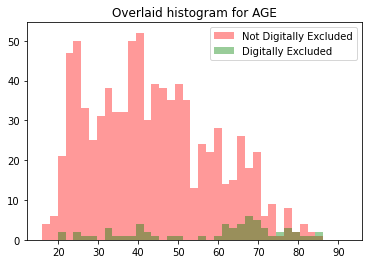

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


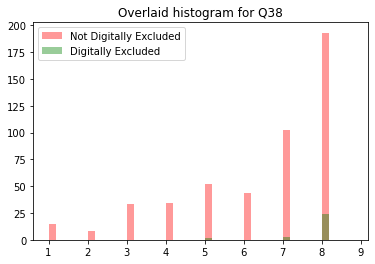

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


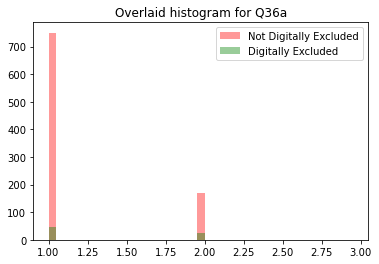

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


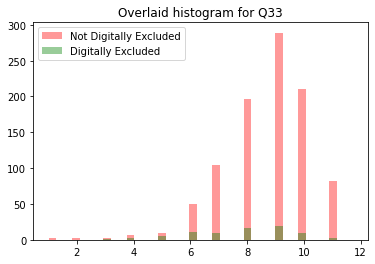

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


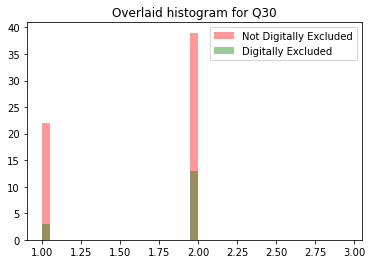

In [33]:
for i in ['AGE', 'Q38', 'Q36a','Q33','Q30']:
    died = list(cont[cont['Target'] == 0][i].dropna())
    survived = list(cont[cont['Target'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Not Digitally Excluded', 'Digitally Excluded'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

In [25]:
cat.head()

,S1,Q3,Q4,Q22,Q29,Q31,Q37a,Postcode_clean,Ward,OutputArea,Publication Use,Financial Worry,Target
0,Female,"Unemployed, Not Registered-Seeking Work",White - British,Rents (With Or Without Housing Benefit),No,NHS,UK,SW1V1DU,Warwick,E00024058,Offline,Concerned,0.0
1,Female,Working - Full Time (30+ HRS),Mixed - White and Asian,Rents (With Or Without Housing Benefit),No,NHS,UK,SW1V1DU,Warwick,E00024058,None,Not Concerned,0.0
2,Female,other,Any - Other White background (type in),Rents (With Or Without Housing Benefit),No,NHS,NaN,SW1V1DU,Warwick,E00024058,None,Concerned,0.0
3,Female,"Unemployed, Not Registered-Seeking Work",Mixed - White and Black - Caribbean,Rents (With Or Without Housing Benefit),Yes,NHS,NaN,SW1V1DU,Warwick,E00024058,None,Not Concerned,0.0
4,Female,"Unemployed, Not Registered-Seeking Work",(Refused),Rents (With Or Without Housing Benefit),No,NHS,NaN,SW1V1DU,Warwick,E00024058,None,Not Concerned,0.0


In [21]:
#Check exclusion by employment
cat.groupby('Q3').mean()

,Target
Q3,
Full-Time Student,0.042857
Retired,0.291339
Unemployed due to ill health,0.147059
"Unemployed, Not Registered-Seeking Work",0.048780
Working - Full Time (30+ HRS),0.036522
other,0.040000


In [22]:
cat.groupby('Q4').mean()

,Target
Q4,
(Refused),0.000000
Any - Other White background (type in),0.043478
Asian or Asian British - Any other Asian Background (type in),0.043478
Asian or Asian British - Bangladeshi,0.250000
Asian or Asian British - Chinese,0.000000
Asian or Asian British - Indian,0.028571
Asian or Asian British - Pakistani,0.107143
Black or Black British - Caribbean,0.050847
Black or Black British - African,0.102564


In [23]:
cat.groupby('Q22').mean()

,Target
Q22,
Live Here Rent Free,0.000000
Owns Outright,0.081967
Owns With A Mortgage Or Loan,0.010989
Part Owns And Part Rents (shared Ownership),0.043478
Rents (With Or Without Housing Benefit),0.083453
Rents A Room In A Shared Property,0.043478


In [24]:
cat.groupby('Q31').mean()

,Target
Q31,
(Don't know),0.000000
NHS,0.074747
None of these,0.064516
Private,0.000000


In [27]:
cat.groupby('S1').mean()

,Target
S1,
Female,0.065347
Male,0.080675


In [29]:
cat.groupby('Publication Use').mean()

,Target
Publication Use,
Dont know,0.000000
None,0.033898
Offline,0.121839
Online,0.022472
Online and Offline,0.043702


In [30]:
cat.groupby('Financial Worry').mean()

,Target
Financial Worry,
Concerned,0.047619
Not Concerned,0.079710


In [31]:
cat.groupby('Ward').mean()

,Target
Ward,
Abbey Road,0.041667
Bayswater,0.035714
Bryanston and Dorset Square,0.071429
Church Street,0.160714
Churchill,0.035714
Harrow Road,0.150000
Hyde Park,0.000000
Knightsbridge and Belgravia,0.053571
Lancaster Gate,0.081633


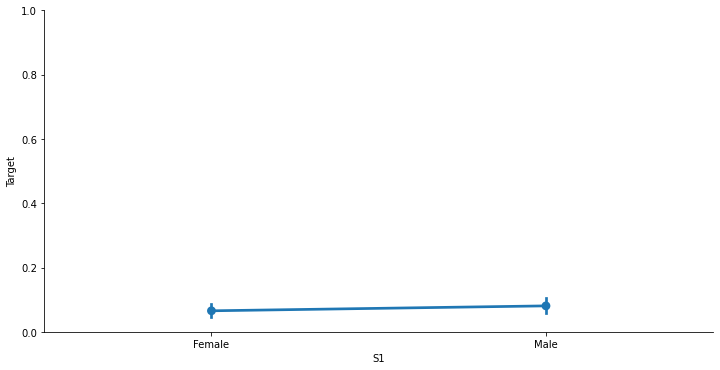

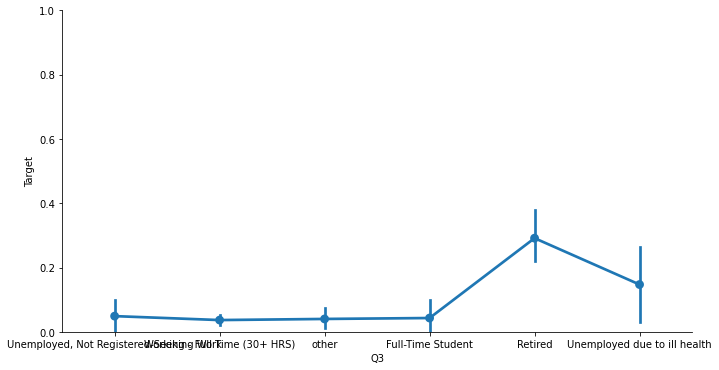

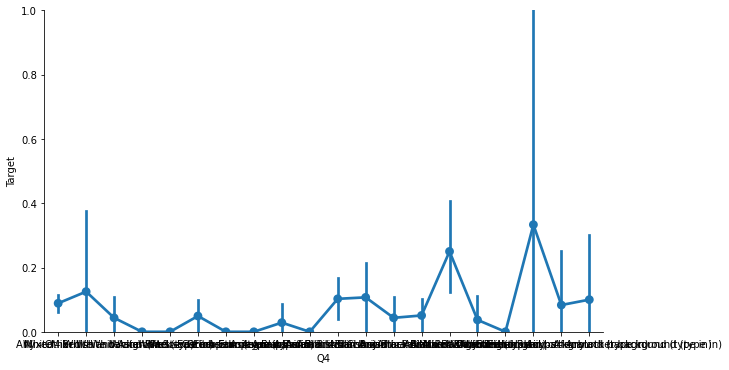

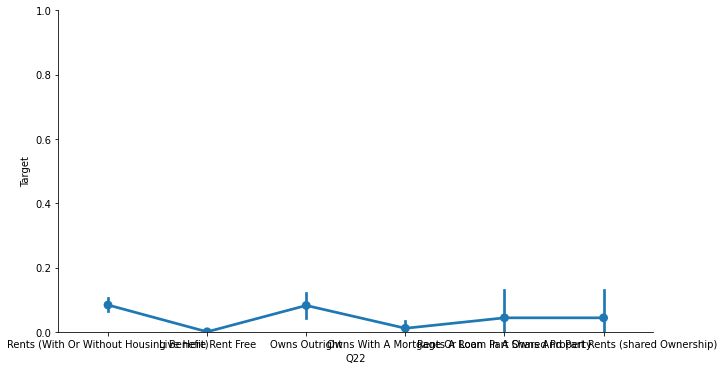

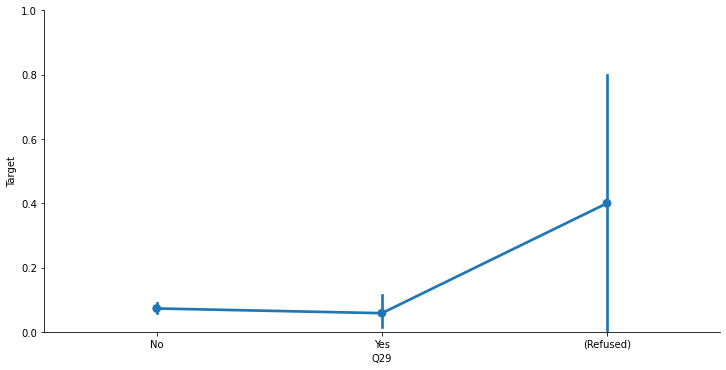

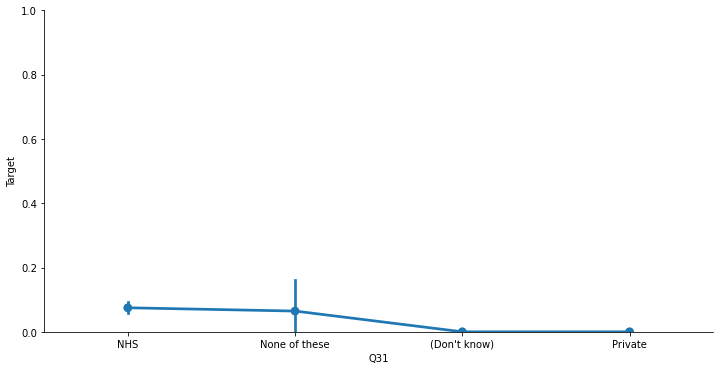

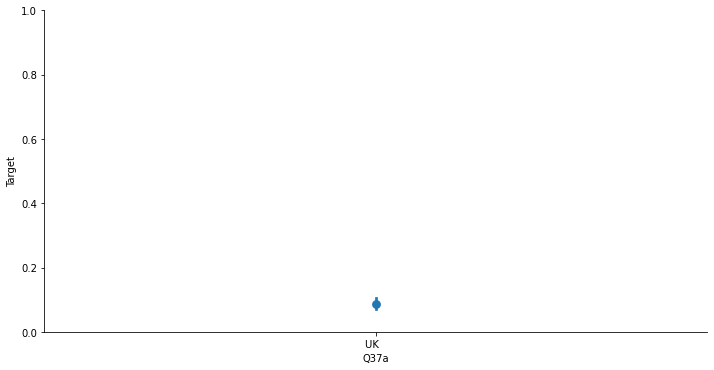

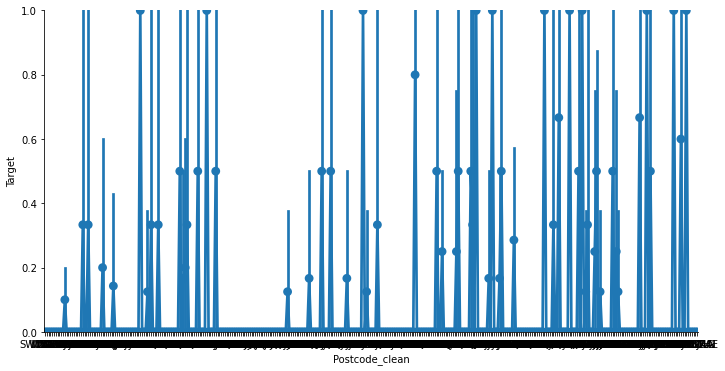

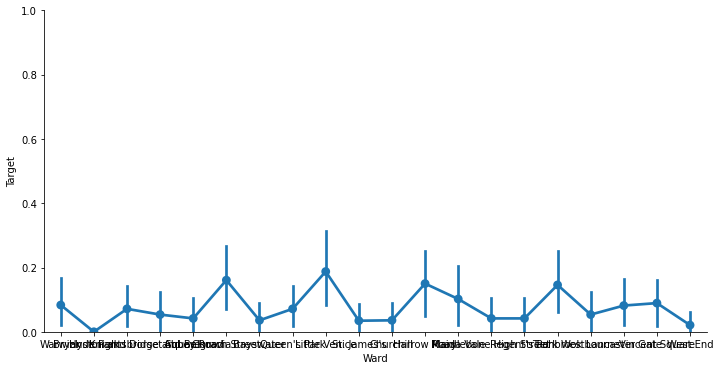

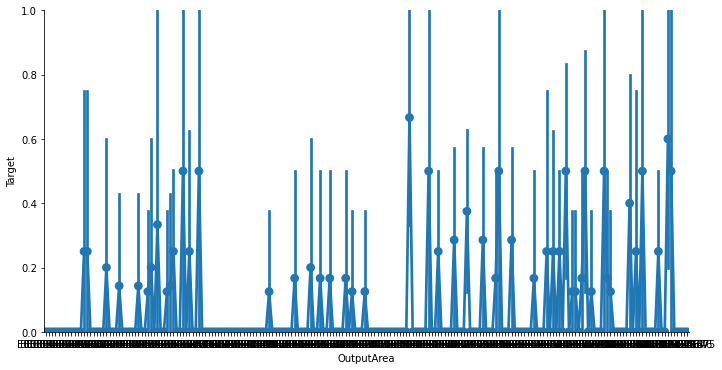

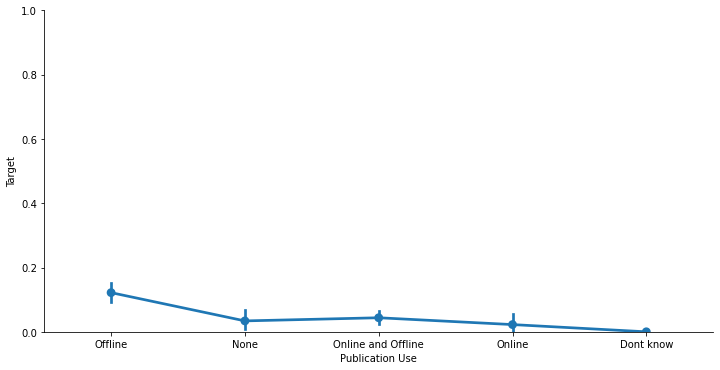

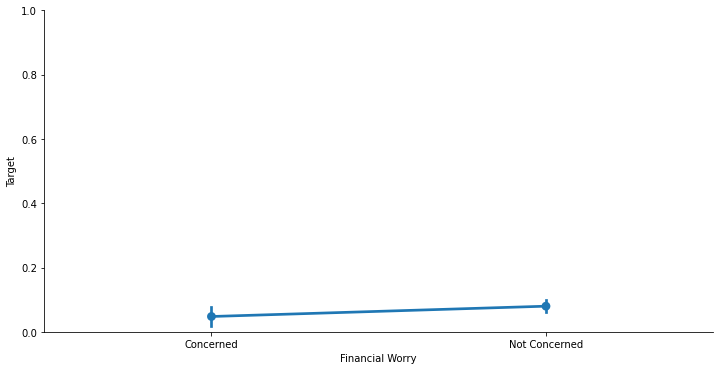

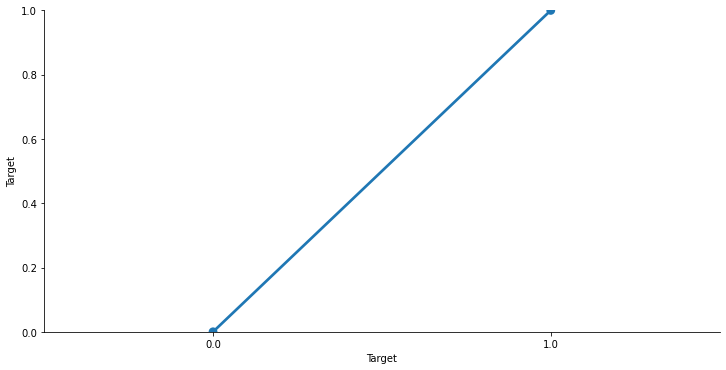

In [32]:
for col in cat.columns:
    sns.catplot(x=col, y='Target', data=cat, kind='point', aspect=2, )
    plt.ylim(0, 1)